### State

In [3]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str

### Nodes

In [5]:
def start_play(state:State):
    print("start_play node has been called")
    return {"graph_info": state["graph_info"] + "I am planning to play"}

In [6]:
def badminton(state:State):
    print("Badminton node has been called")
    return {"graph_info": state["graph_info"] + " badminton"}

In [7]:
def cricket(state:State):
    print("Cricket node has been called")
    return {"graph_info": state["graph_info"] + " cricket"}

In [8]:
import random
from typing import Literal

def random_play(state:State)-> Literal['cricket','badminton']:
    graph_info = state['graph_info']

    if random.random() > 0.5:
        return 'cricket'
    else: 
        return 'badminton'

### Graph construction

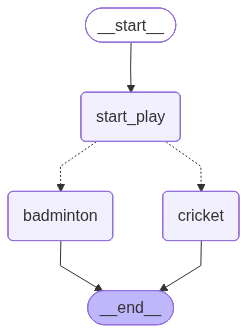

In [14]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## Build Graph
graph = StateGraph(State)

## Adding nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", badminton)

## Schedule the flow of the graph
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

## Compile the graph
graph_builder = graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))


### Graph Invocation

In [27]:
graph_builder.invoke({"graph_info":"Hey my name is Chris "})

start_play node has been called
Cricket node has been called


{'graph_info': 'Hey my name is Chris I am planning to play cricket'}

## LangGraph Simple Chatbot

In [12]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

# Reducer
from typing import Annotated
from langgraph.graph.message import add_messages

from dotenv import load_dotenv
import os
load_dotenv("./.env")

from langchain_openai import AzureChatOpenAI
from langchain_groq import ChatGroq

from IPython.display import display, Image

os.environ["OPENAI_API_VERSION"] = "2023-12-01-preview"
os.environ["AZURE_OPENAI_ENDPOINT"] = os.getenv("OPENAI_API_END")
os.environ["AZURE_OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [2]:
llm = AzureChatOpenAI(
    model="gpt-4o-mini"
)

In [6]:
llm_groq = ChatGroq(model="openai/gpt-oss-20b")

In [9]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

### Nodes

In [10]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

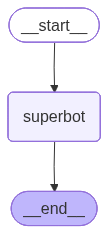

In [13]:
graph = StateGraph(State)

# Nodes
graph.add_node("superbot", superbot)

# Edges
graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

# Compile
graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
graph_builder.invoke({"messages":"Hi, my name is Cris and I love soccer"})

{'messages': [HumanMessage(content='Hi, my name is Cris and I love soccer', additional_kwargs={}, response_metadata={}, id='8b410d92-cdf8-4e7e-9301-2588985d8c3a'),
  AIMessage(content='Hey Cris! 👋🏼 It’s awesome to meet another soccer fan. What’s your favorite team or league? Do you have a favorite player you’re rooting for right now? I’d love to hear about your soccer adventures! ⚽️', additional_kwargs={'reasoning_content': 'We need to respond warmly, ask about soccer, maybe about teams, favorite player, etc.'}, response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 81, 'total_tokens': 159, 'completion_time': 0.077562762, 'prompt_time': 0.003949277, 'queue_time': 0.201397643, 'total_time': 0.081512039}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_c5a89987dc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--e96efb62-8168-4b4c-934c-e5cc7f25d42a-0', usage_metadata={'input_tokens': 81, 'output_tokens': 78, 'total_tok

### Streaming responses

In [19]:
for event in graph_builder.stream({"messages":"Hello, my name is Cris and I love basquetball"}, stream_mode="updates"):
    print(event)

{'superbot': {'messages': [AIMessage(content='Hey Cris! It’s great to meet a fellow basketball fan. What’s your favorite team, and do you usually watch the games live or catch them on TV? If you’re into the NBA, there are so many exciting players and matchups—maybe you’ve got a favorite player too!', additional_kwargs={'reasoning_content': 'The user says: "Hello, my name is Cris and I love basquetball". They are greeting and sharing a fact. The system says we should respond in a friendly manner, ask about their favorite team or something. Also we must not mention policies. Just a friendly chat.'}, response_metadata={'token_usage': {'completion_tokens': 126, 'prompt_tokens': 83, 'total_tokens': 209, 'completion_time': 0.159955674, 'prompt_time': 0.00450915, 'queue_time': 0.199796359, 'total_time': 0.164464824}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_77f8660d1d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--adbc6200-95da-4610-96